# <font color=#025dfa> Derin Öğrenme Regression ile Sel Tahmini - Flood Prediction with Deep Learning Regression

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, sel olaylarını tahmin etmek amacıyla derin öğrenme tabanlı regresyon modelleri geliştirmeyi hedeflemektedir. İklim verileri, yağış miktarları, toprak nemi ve diğer çevresel faktörler gibi değişkenler kullanılarak, olası sel durumlarının önceden tahmin edilmesi sağlanacaktır. Proje, doğal afetlerin etkilerini azaltmak ve erken uyarı sistemleri geliştirmek için daha doğru sel tahminleri sunmayı amaçlamaktadır. Derin öğrenme tekniklerinin kullanımı, karmaşık veri ilişkilerini modelleme yeteneği sayesinde sel risklerini daha etkin bir şekilde yönetmeyi mümkün kılacaktır.

EN = This project aims to develop deep learning-based regression models to predict flood events. Using variables such as climate data, rainfall, soil moisture and other environmental factors, possible flood situations will be predicted in advance. The project aims to provide more accurate flood predictions to reduce the effects of natural disasters and develop early warning systems. The use of deep learning techniques will make it possible to manage flood risks more effectively thanks to the ability to model complex data relationships.

Kaynak/Source = https://www.kaggle.com/competitions/playground-series-s4e5

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import math
import warnings
warnings.filterwarnings('ignore')
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('train.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [5]:
df.sample(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
479847,479847,4,3,13,7,7,5,5,5,4,4,7,7,1,8,4,5,3,6,3,5,0.555
830092,830092,4,3,3,2,3,6,4,1,8,6,5,6,2,2,5,6,7,2,8,11,0.455
840901,840901,3,4,2,6,7,8,2,7,6,5,6,9,2,1,6,4,4,4,5,8,0.515
671831,671831,5,7,5,6,7,6,3,8,2,6,3,4,4,6,4,4,2,5,3,2,0.485
453507,453507,2,4,7,3,3,5,3,5,8,3,5,3,6,6,8,3,6,4,3,5,0.480


In [6]:
df.tail()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
1117952,1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,0.495
1117956,1117956,4,5,6,9,5,5,2,8,4,5,1,4,8,6,5,5,6,7,7,8,0.560


In [7]:
df.shape

(1117957, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [9]:
df.isnull().sum().sort_values(ascending=False)

id                                 0
MonsoonIntensity                   0
PoliticalFactors                   0
InadequatePlanning                 0
WetlandLoss                        0
PopulationScore                    0
DeterioratingInfrastructure        0
Watersheds                         0
Landslides                         0
CoastalVulnerability               0
DrainageSystems                    0
IneffectiveDisasterPreparedness    0
Encroachments                      0
AgriculturalPractices              0
Siltation                          0
DamsQuality                        0
ClimateChange                      0
Urbanization                       0
Deforestation                      0
RiverManagement                    0
TopographyDrainage                 0
FloodProbability                   0
dtype: int64

In [10]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [11]:
df.corr(numeric_only=True)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,-0.000147,-0.000208,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,-0.008032,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,-0.010746,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,-0.010675,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,-0.009512,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,-0.012685,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,-0.011346,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,-0.009515,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,-0.009099,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,-0.010763,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


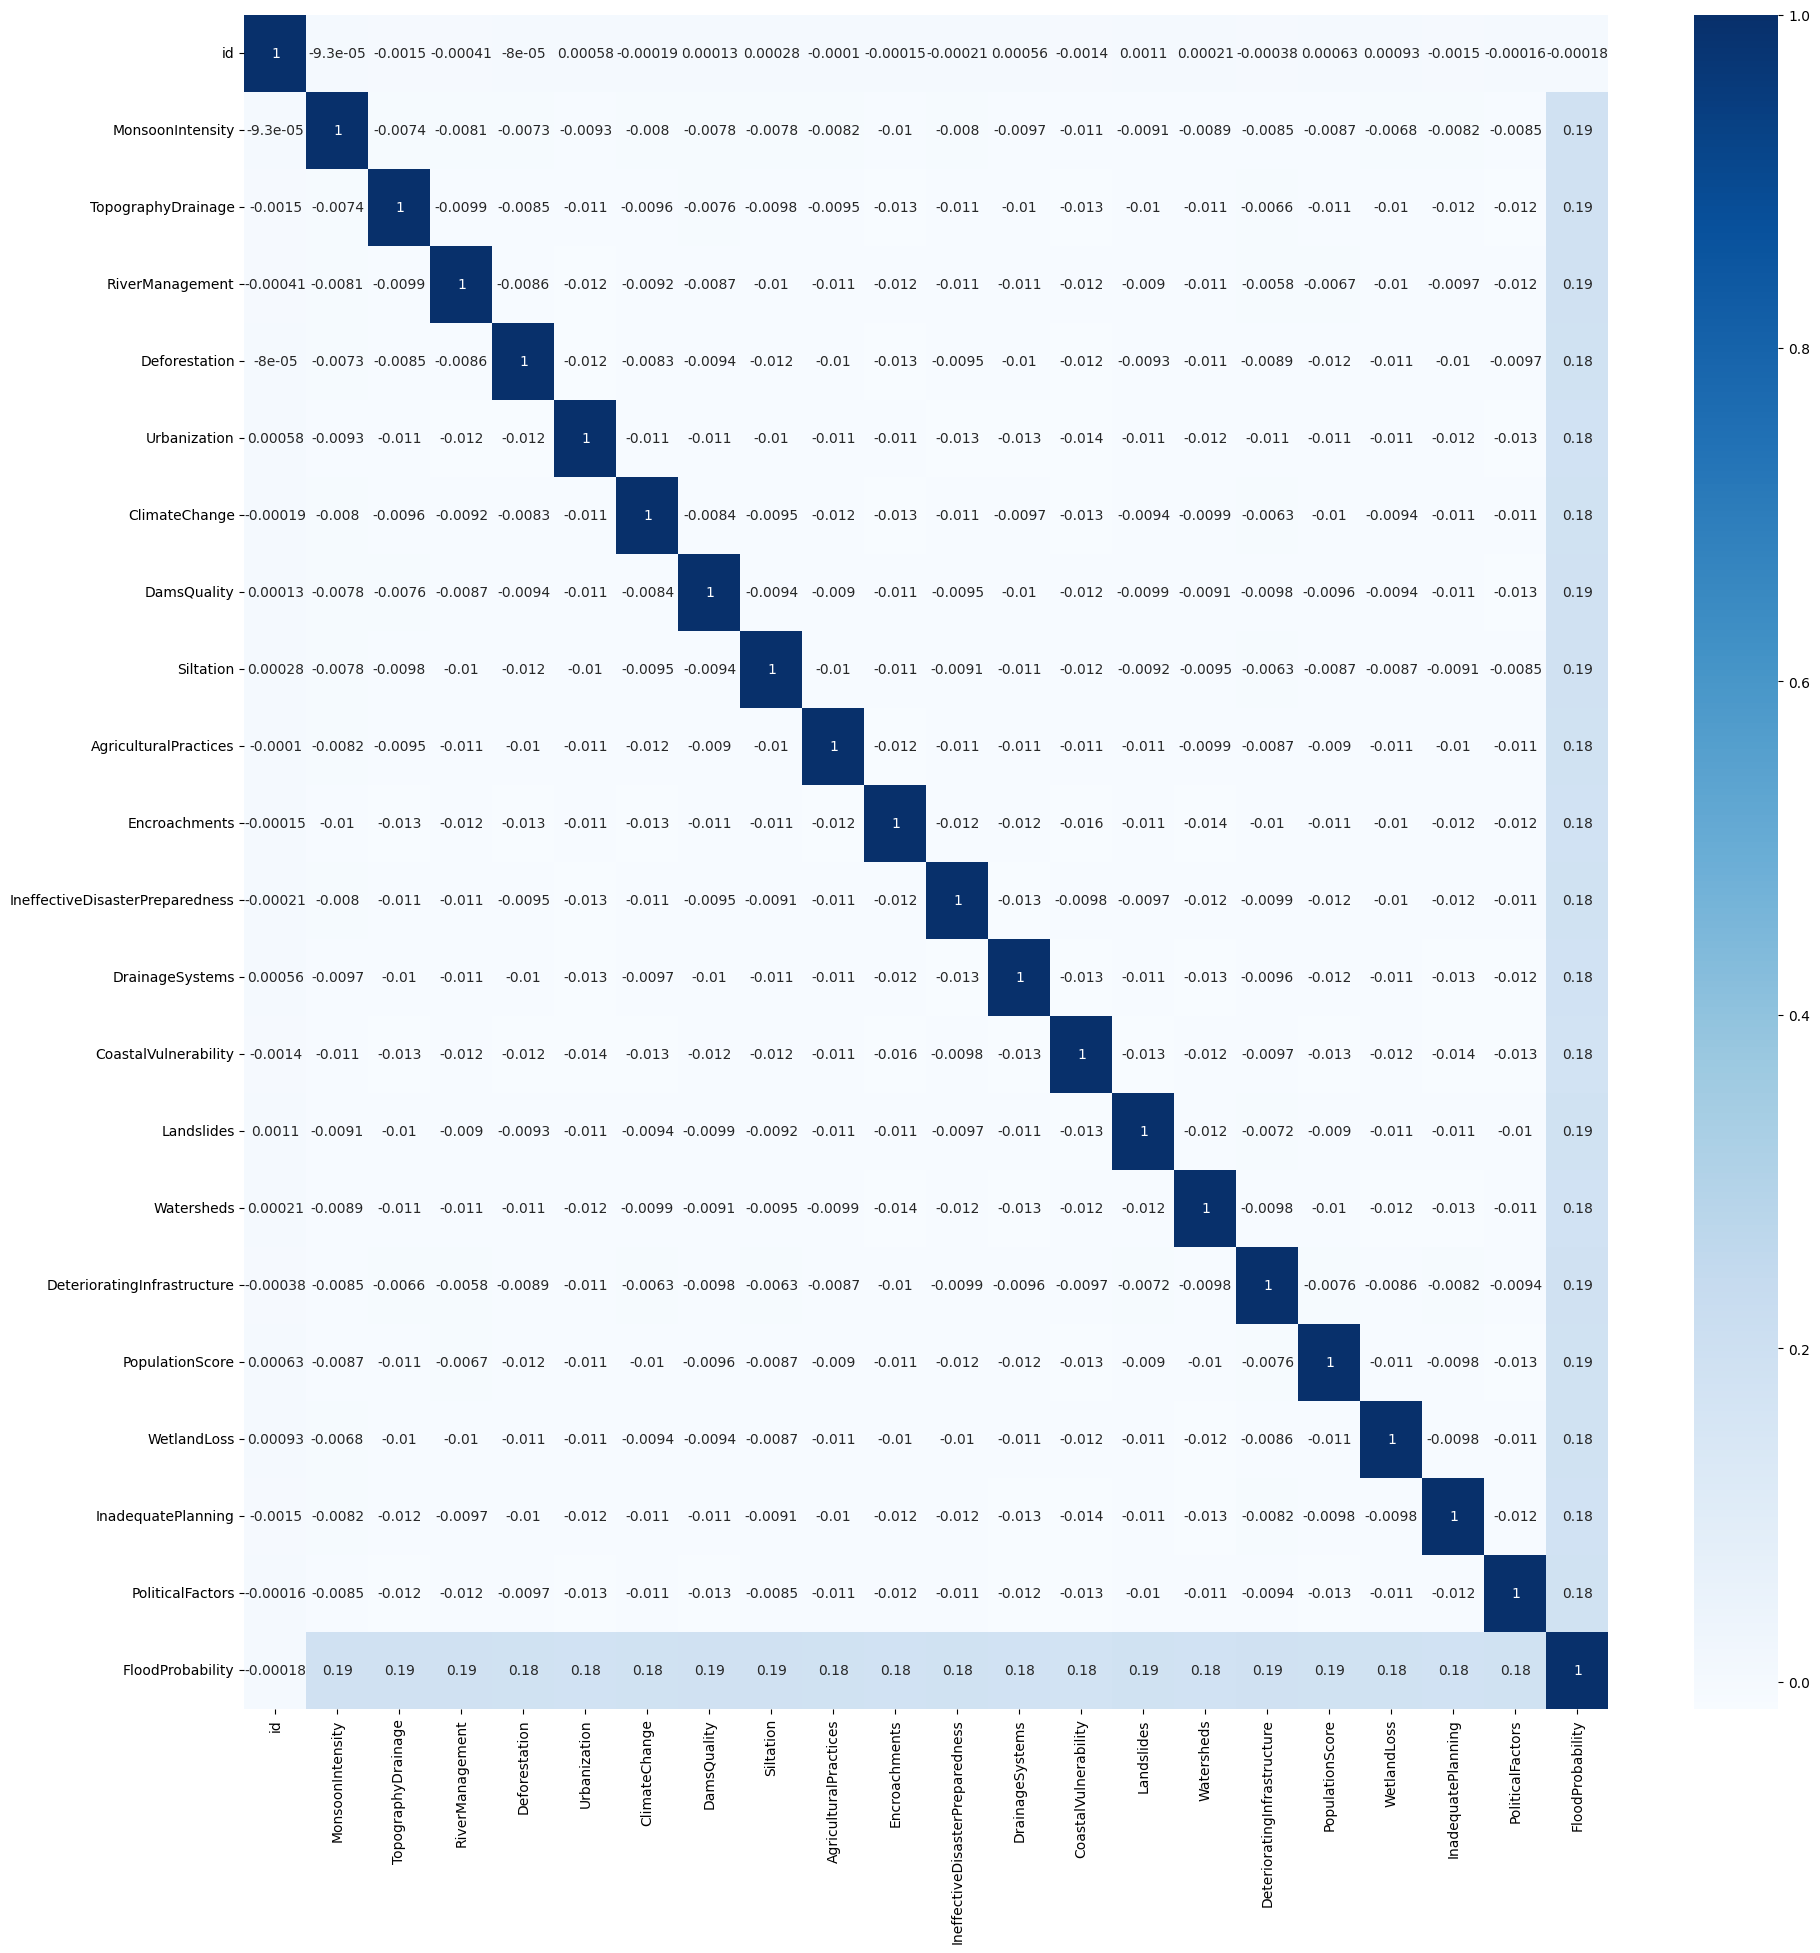

In [12]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [13]:
abs(df.corr(numeric_only=True)['FloodProbability']).sort_values(ascending=False)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                 0.000184
Name: FloodProbability, dtype: f

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [14]:
df=df.drop('id',axis=1)
df.head(1)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445


## <font color=#1cfc03> Aykırı Değer - Outlier

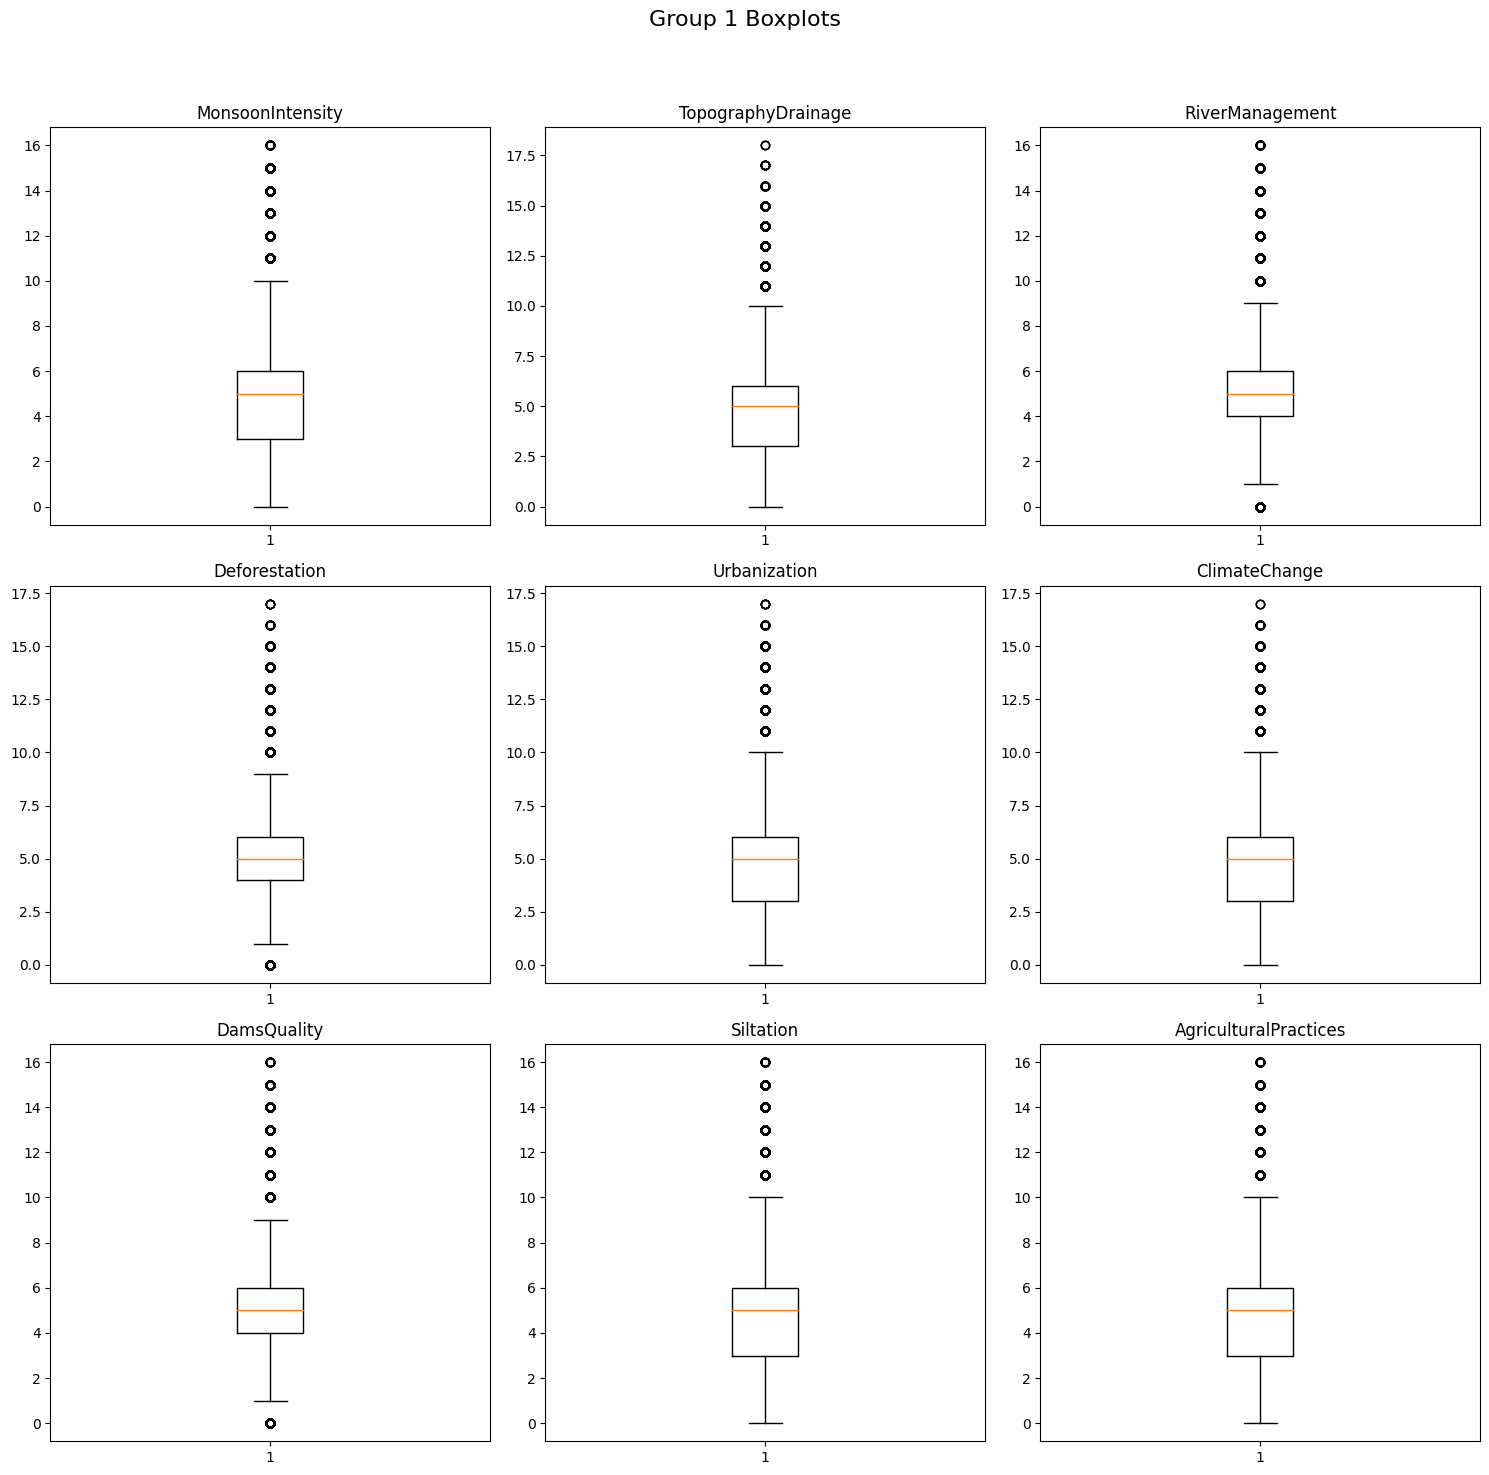

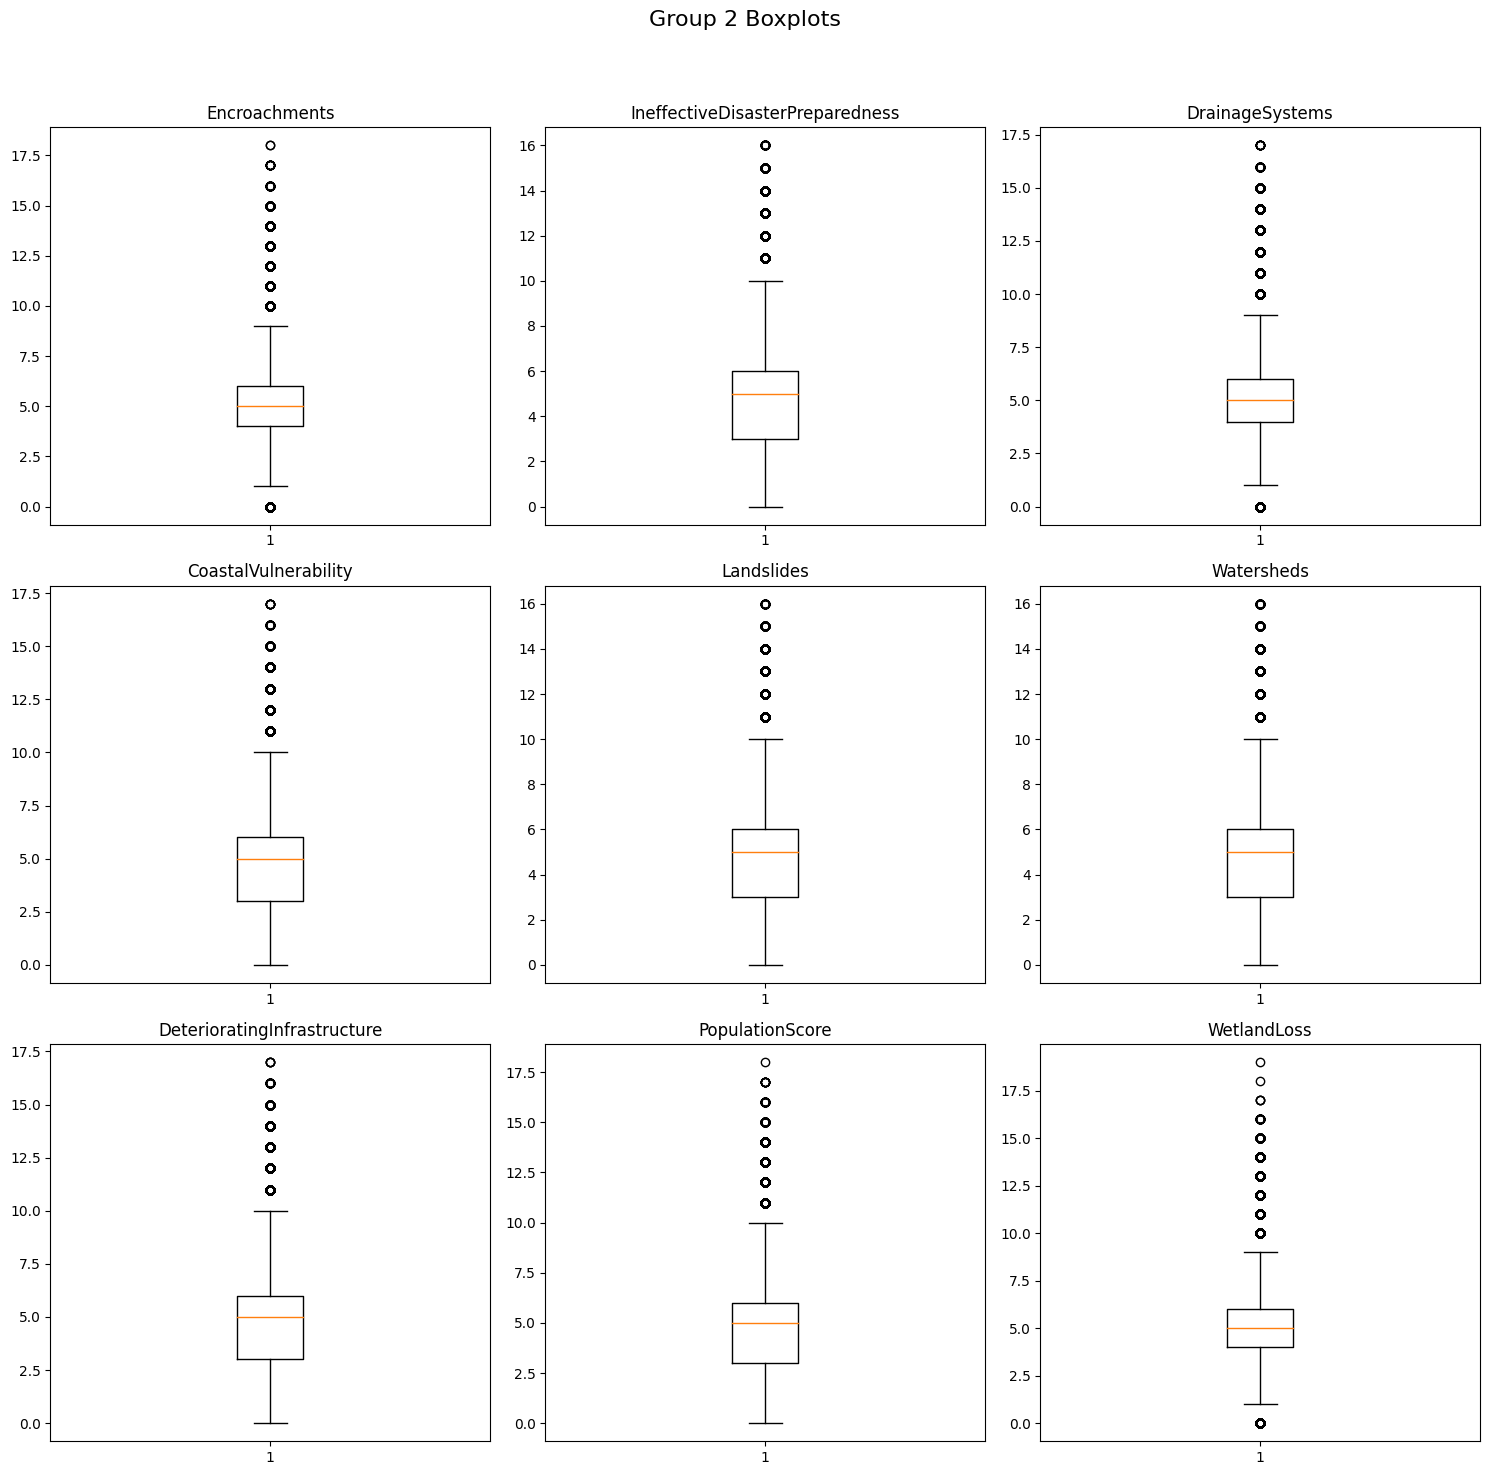

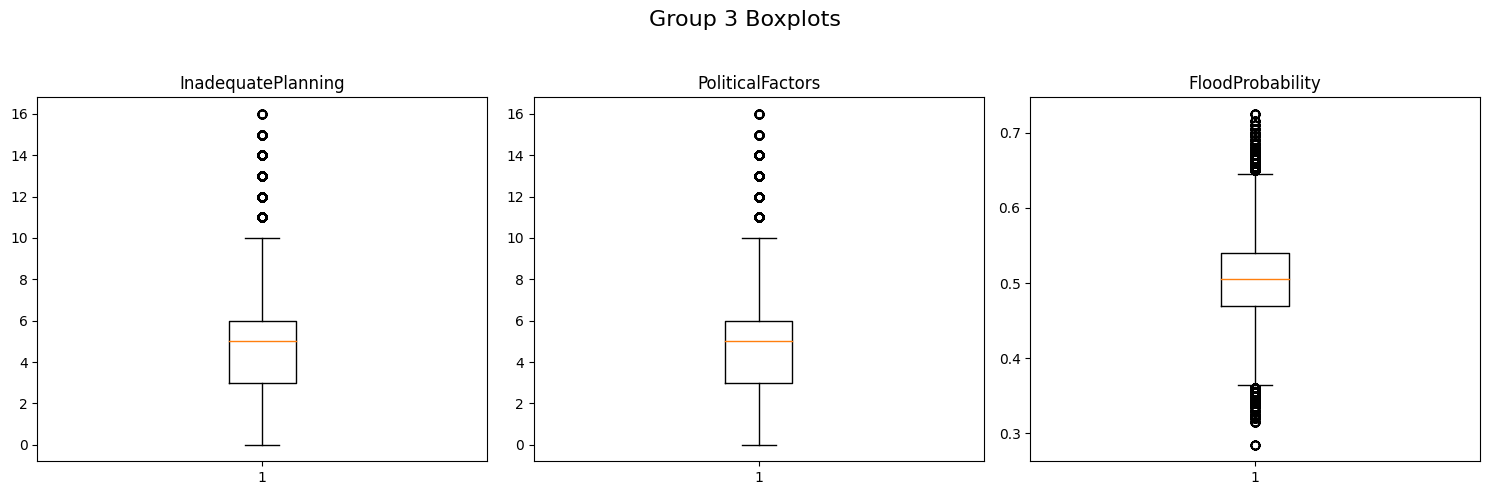

In [15]:
# Sadece int ve float sütunlarını seç
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Her bir subplot grubu 9 grafikten oluşacak şekilde grup sayısını hesapla
num_cols = len(numeric_cols)
num_plots_per_group = 9
num_groups = math.ceil(num_cols / num_plots_per_group)

# Boxplot çizimi
for group in range(num_groups):
    # Şu anki grubun sütunlarını seç
    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]
    
    # Alt grafiklerin boyutunu ayarla
    num_plots = len(cols_in_group)
    rows = math.ceil(num_plots / 3)  # 3 sütun olacak şekilde düzenle
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    
    # Eğer sadece tek bir satır varsa, axs bir liste değil tek bir eksen olabilir
    axs = axs.flatten() if num_plots > 1 else [axs]
    
    # Seçilen her sütun için boxplot çiz
    for i, col in enumerate(cols_in_group):
        axs[i].boxplot(df[col].dropna())  # NaN değerleri düş
        axs[i].set_title(col)
    
    # Boş subplot'ları gizle
    for i in range(num_plots, len(axs)):
        axs[i].set_visible(False)
    
    # Grup numarasını belirt
    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Tabloların aralarındaki boşlukları düzenle
    plt.show()


In [16]:
# TR = Aykırı değer çok fazla olduğu için işlem yapmadık. 
# EN = We did not take any action because there were too many outliers.

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [17]:
for column in df.columns:
    print(f"\nSütun: {column}")
    unique_values = df[column].dropna().unique()  # NaN değerleri atla ve unique değerleri al
    
    if pd.api.types.is_numeric_dtype(df[column]):  # Eğer sütun numerikse (int veya float)
        unique_values = sorted(unique_values)  # Küçükten büyüğe sırala
    
    print(f"Unique Değerler: {unique_values}")


Sütun: MonsoonIntensity
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Sütun: TopographyDrainage
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Sütun: RiverManagement
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Sütun: Deforestation
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Sütun: Urbanization
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Sütun: ClimateChange
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Sütun: DamsQuality
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Sütun: Siltation
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Sütun: AgriculturalPractices
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Sütun: Encroachments
Unique Değerler: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1

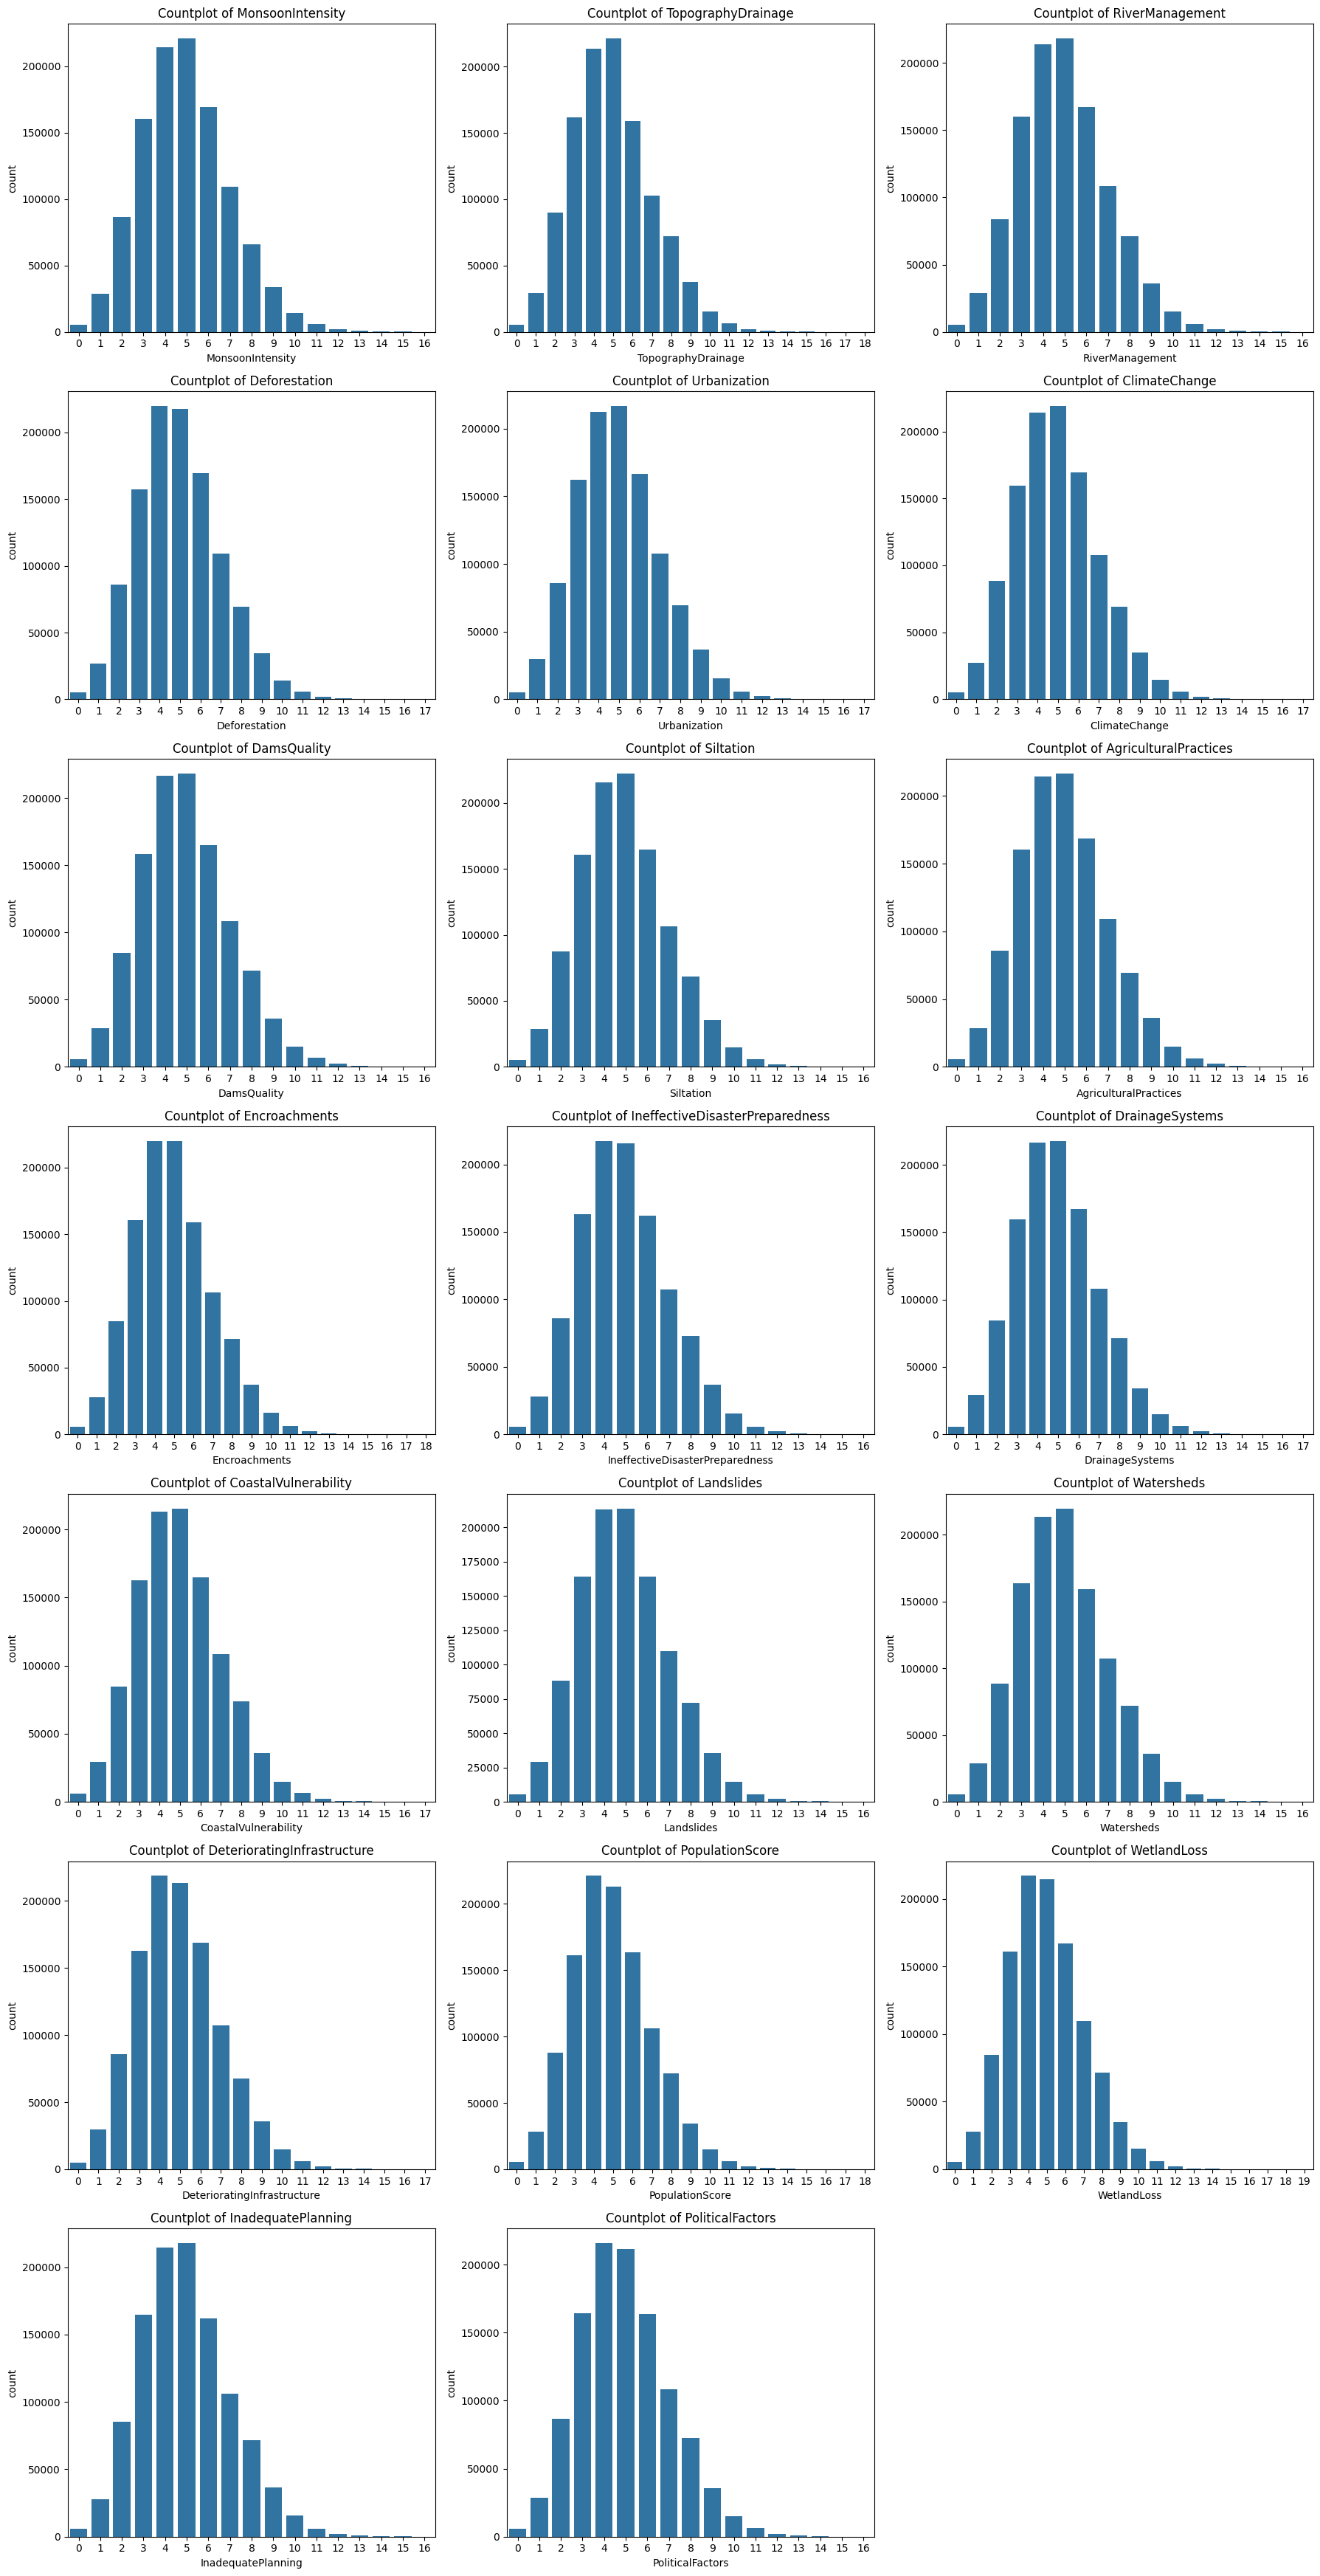

In [18]:
excluded_columns = ['FloodProbability']  
# TR = excluded_columns'ma eşitlenmiş sütunları görselleştirmeden hariç tutuyoruz.
# EN = We exclude columns equal to excluded_columns from the visualization.

columns = [col for col in df.columns if col not in excluded_columns]
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col not in excluded_columns) excluded_columns değişkeninin içindeki sütun adlarına bakma.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col not in excluded_columns) Look at the column names in the excluded_columns variable.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.countplot(data=df, x=column, ax=axes[row, col])  
    # TR = Veri çerçevesindeki belirli bir sütun için countplot (sayı grafiği) çizer  
    # EN = Draws a countplot (bar plot) for a specific column from the dataframe

    axes[row, col].set_title(f'Countplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

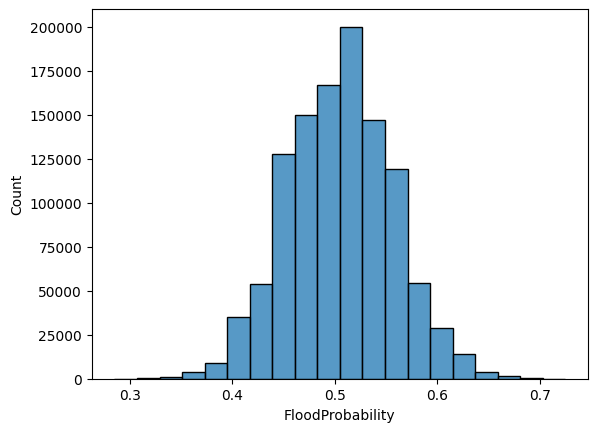

In [19]:
sns.histplot(x='FloodProbability', data=df, bins=20);
# TR = Tek bir değişkenin frekans dağılımını göstermek için kullanılır.
# EN = Used to display the frequency distribution of a single variable.


## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [20]:
x=df.drop('FloodProbability',axis=1)
y=df[['FloodProbability']]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik. 
# EN = We trained our model.

In [22]:
scaler = MinMaxScaler()
# TR = Girdilerin belirli bir aralıkta olması performansı artırır. Bu nedenle MinMaxScaler ile verileri 0 ile 1 arasında normalize ediyoruz.
# EN = Having inputs within a certain range improves performance. Therefore, we normalize the data between 0 and 1 with MinMaxScaler.

x_train = scaler.fit_transform(x_train)
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

In [23]:
model=Sequential()
model.add(Dense(128,activation='relu'))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 128 nöron var.
# Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 128 neurons.
# Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

#model.add(BatchNormalization())
# TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
# EN = This layer is used to make the training process of the model more stable.

#model.add(Dropout(0.3))
# TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır. Genelde 0.2 ile 0.5 arasında olur.
# EN = It is used to reduce overfitting in the deep learning model. It is generally between 0.2 and 0.5.

model.add(Dense(64,activation='relu',input_dim=x_train.shape[1]))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Flatten())
# TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
# EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])  
# TR = Modelin kayıp fonksiyonu olarak 'mse' (ortalama kare hatası), optimizer olarak 'adam' ve performans metriği olarak 'mae' (ortalama mutlak hata) kullanılarak derlenmesini sağlar  
# EN = Compiles the model using 'mse' (mean squared error) as the loss function, 'adam' as the optimizer, and 'mae' (mean absolute error) as the performance metric

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100)
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 32 olarak belirlenmiş., callbacks=[early_stopping]
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 32.

Epoch 1/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 7.5385e-04 - mae: 0.0185 - val_loss: 4.0594e-04 - val_mae: 0.0158
Epoch 2/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.2120e-04 - mae: 0.0161 - val_loss: 4.3462e-04 - val_mae: 0.0154
Epoch 3/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.0709e-04 - mae: 0.0158 - val_loss: 3.9526e-04 - val_mae: 0.0153
Epoch 4/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.0190e-04 - mae: 0.0158 - val_loss: 4.1586e-04 - val_mae: 0.0167
Epoch 5/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.0020e-04 - mae: 0.0158 - val_loss: 3.8973e-04 - val_mae: 0.0157
Epoch 6/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 4.0080e-04 - mae: 0.0158 - val_loss: 3.9323e-04 - val_mae: 0.0160
Epoch 7/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.9753e-04 - mae: 0.0157 - val_loss: 3.8962e-04 - val_mae: 0.0158
Epoch 8/100
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.9486e-04 - mae: 0.0156 - 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,709 (159.02 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,140 (106.02 KB)

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

6988/6988 ━━━━━━━━━━━━━━━━━━━━ 4s 614us/step - loss: 3.5393e-04 - mae: 0.0148
Test doğruluğu: 0.0148


In [26]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

6988/6988 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step


In [27]:
r2_score(y_test,pred) 
# TR = Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır ve arasındaki farkı bul. 
# EN = Compare this with the actual (y_test) value and the predicted (pred) values ​​and find the difference between them.

0.8633831207453261

In [28]:
mean_squared_error(y_test,pred)**.5 
# TR = Burada, Root Mean Square Error bulduk. Bunu gerçek(y_test) değer ile tahmin(pred) edilen değerleri karşılaştır arasındaki farkı bul ve **.5 ile karekökünü al.
# EN = Here, we found Root Mean Square Error. Compare this with the actual (y_test) value and the predicted (pred) values, find the difference and take the square root of **.5.

0.018844228538991356

In [29]:
mean_absolute_error(y_test,pred)
# TR = mean_absolute_error ile (y_test,pred) kullanarak değerini hesaplama. 
# EN = Calculating the value of mean_absolute_error using (y_test,pred).

0.014808551506556366

In [30]:
residuals=y_test-pred

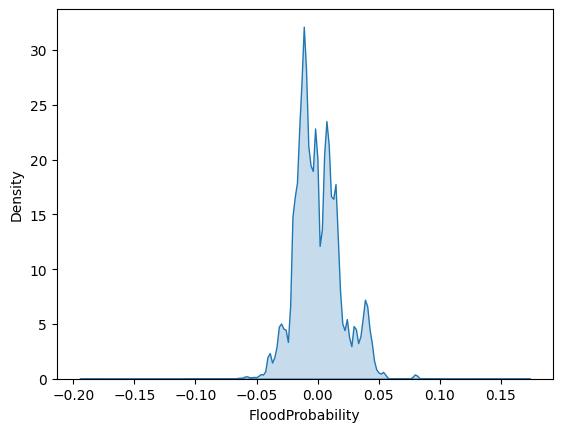

In [31]:
sns.kdeplot(x=residuals['FloodProbability'],fill=True);
# TR = Veri dağılımını pürüzsüz bir şekilde tahmin etmek için kullanılan bir yoğunluk grafiğidir. Kernel Yoğunluk Tahmini (KDE) ile verinin altında yatan olasılık dağılımını görselleştirir.
# EN = It is a density plot used to smoothly estimate the distribution of data. It visualizes the underlying probability distribution of data using Kernel Density Estimation (KDE).

In [32]:
loss_f=pd.DataFrame(history.history)

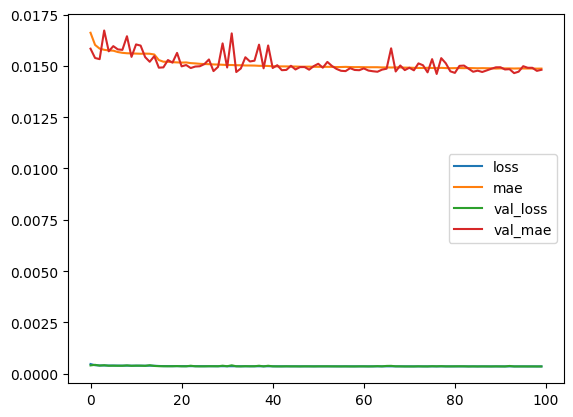

In [33]:
loss_f.plot();

In [34]:
pickle.dump(model,open('Sel.pkl','wb'))